In [ ]:
!unzip sample_data/fruits-sample.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-sample/Training/Pepper Orange/r_33_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_34_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_35_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_36_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_37_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_38_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_39_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_4_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_40_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_41_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_42_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_43_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_44_100.jpg  
  inflating: fruits-sample/Training/Pepper Orange/r_45_100.jpg  
  inflating: fruits-sample/Training/Pepp

Training image[0] : 


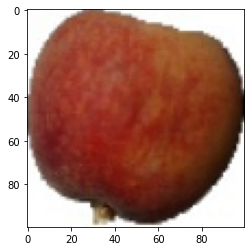

In [ ]:
import os
from PIL import Image
import numpy as np
import cv2
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

id = 0 
class_names = {}
training_labels = []
training_images = []
for root, dirs, files in os.walk("/content/fruits-sample/Training"):
    for file in files:
        if file.endswith("jpg") or file.endswith("JPG"):
            path = os.path.join(root,file)
            name = os.path.basename(os.path.dirname(path)).title()
            if not name in class_names:
                class_names[name] = id
                id += 1

            fruit_label = class_names[name]
            training_labels.append(fruit_label)
            
            img_array=cv2.imread(path)
            img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB) 
            
            training_images.append((img_array))

testing_labels = []
testing_images = []
test_class_names = {}
id2 = 0
for root, dirs, files in os.walk("/content/fruits-sample/Test"):
    for file in files:
        if file.endswith("jpg") or file.endswith("JPG"):
            path = os.path.join(root,file)
            name = os.path.basename(os.path.dirname(path)).title()
            if not name in test_class_names:
                test_class_names[name] = id2
                id2 += 1
                
            fruit_label = test_class_names[name]
            testing_labels.append(fruit_label)
            
                
            img_array=cv2.imread(path)
            img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            testing_images.append(img_array)

training_images = np.array(training_images) 
testing_images = np.array(testing_images)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

training_images = training_images.astype('float32')/255
testing_images = testing_images.astype('float32')/255

print("Training image[0] : ")
plt.imshow(training_images[0])

In [ ]:
#model.fit(training_images, training_labels, epochs=10)
print(training_images.shape)


import pandas as pd


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100, 100,3)),
    tf.keras.layers.Dense(50*16, activation='relu'),
    tf.keras.layers.Dense(50)
])

model.compile(optimizer='adam',
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50)

#testing metrics
print("")
print("_____FINAL LOSS/ACCURACY_____")
print("")
test_loss, test_acc = model.evaluate(testing_images,  testing_labels, verbose=2)



(25673, 100, 100, 3)
Epoch 1/50
803/803 [==============================] - 6s 8ms/step - loss: 1.9132 - accuracy: 0.7736
Epoch 2/50
803/803 [==============================] - 6s 8ms/step - loss: 0.1427 - accuracy: 0.9601
Epoch 3/50
803/803 [==============================] - 6s 8ms/step - loss: 0.0816 - accuracy: 0.9761
Epoch 4/50
803/803 [==============================] - 6s 8ms/step - loss: 0.0861 - accuracy: 0.9739
Epoch 5/50
803/803 [==============================] - 6s 8ms/step - loss: 0.1294 - accuracy: 0.9630
Epoch 6/50
803/803 [==============================] - 6s 8ms/step - loss: 0.0547 - accuracy: 0.9837
Epoch 7/50
803/803 [==============================] - 6s 8ms/step - loss: 0.1029 - accuracy: 0.9740
Epoch 8/50
803/803 [==============================] - 6s 8ms/step - loss: 0.0676 - accuracy: 0.9813
Epoch 9/50
803/803 [==============================] - 6s 8ms/step - loss: 0.0782 - accuracy: 0.9828
Epoch 10/50
803/803 [==============================] - 6s 8ms/step - loss: 0.03

['Peach', 'Kiwi', 'Apricot', 'Corn', 'Cherry 1', 'Ginger Root', 'Mango Red', 'Blueberry', 'Huckleberry', 'Apple Braeburn', 'Pepper Orange', 'Pepper Red', 'Cauliflower', 'Cherry Wax Black', 'Fig', 'Cantaloupe 1', 'Grape Blue', 'Kumquats', 'Lemon', 'Pepper Yellow', 'Strawberry', 'Onion White', 'Apple Red 1', 'Tomato Cherry Red', 'Mango', 'Cocos', 'Limes', 'Cucumber Ripe', 'Banana', 'Chestnut', 'Walnut', 'Dates', 'Cantaloupe 2', 'Apple Golden 2', 'Pineapple', 'Tomato 1', 'Grape White', 'Avocado', 'Clementine', 'Orange', 'Mulberry', 'Apple Granny Smith', 'Beetroot', 'Pepper Green', 'Eggplant', 'Hazelnut', 'Onion Red', 'Grapefruit Pink', 'Banana Red', 'Plum']

MANUAL COMPARISONS : 
Predicted class image[12] = 0(Peach)
Actual class image[12] = 0(Peach)


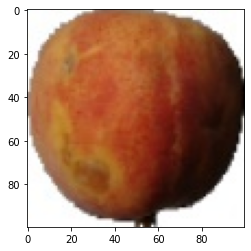

In [ ]:
#manual comparisions
predictions = model.predict(testing_images)
key_list = list(test_class_names.keys()) 
val_list = list(test_class_names.values()) 

y_true = testing_labels
y_pred = predictions.argmax(axis=1)


print(key_list)
print("")
print("MANUAL COMPARISONS : ")
#image[12]
print("Predicted class image[12] = " + str(np.argmax(predictions[12])) + "("+key_list[val_list.index(0)]+")")
print("Actual class image[12] = " + str(testing_labels[12]) + "("+key_list[val_list.index(0)]+")")
plt.imshow(testing_images[12])

Predicted class image[1200] = 8(Mango Red)
Actual class image[1200] = 8(Mango Red)


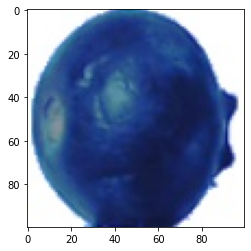

In [ ]:
#image[1200]
print("Predicted class image[1200] = " + str(np.argmax(predictions[1200])) + "("+key_list[val_list.index(6)]+")")
print("Actual class image[1200] = " + str(testing_labels[1200]) + "("+key_list[val_list.index(6)]+")")
plt.imshow(testing_images[1200])

{'Peach': 0, 'Kiwi': 1, 'Apricot': 2, 'Corn': 3, 'Cherry 1': 4, 'Ginger Root': 5, 'Mango Red': 6, 'Blueberry': 7, 'Huckleberry': 8, 'Apple Braeburn': 9, 'Pepper Orange': 10, 'Pepper Red': 11, 'Cauliflower': 12, 'Cherry Wax Black': 13, 'Fig': 14, 'Cantaloupe 1': 15, 'Grape Blue': 16, 'Kumquats': 17, 'Lemon': 18, 'Pepper Yellow': 19, 'Strawberry': 20, 'Onion White': 21, 'Apple Red 1': 22, 'Tomato Cherry Red': 23, 'Mango': 24, 'Cocos': 25, 'Limes': 26, 'Cucumber Ripe': 27, 'Banana': 28, 'Chestnut': 29, 'Walnut': 30, 'Dates': 31, 'Cantaloupe 2': 32, 'Apple Golden 2': 33, 'Pineapple': 34, 'Tomato 1': 35, 'Grape White': 36, 'Avocado': 37, 'Clementine': 38, 'Orange': 39, 'Mulberry': 40, 'Apple Granny Smith': 41, 'Beetroot': 42, 'Pepper Green': 43, 'Eggplant': 44, 'Hazelnut': 45, 'Onion Red': 46, 'Grapefruit Pink': 47, 'Banana Red': 48, 'Plum': 49}
[ 0  0  0 ... 49 49 49]
[ 0  0  0 ... 29 49 49]
[[159   0   0 ...   1   0   0]
 [  0 156   0 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 

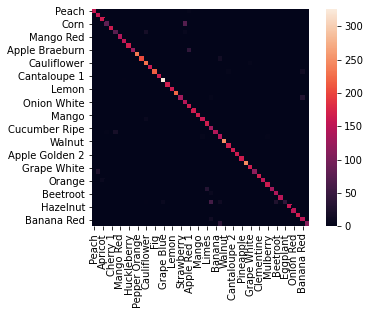

In [ ]:
# Model Accuracy: how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(testing_labels, predictions))
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
print(class_names)
print(training_labels)
print(predictions.argmax(axis=1))


confusion_matrix(testing_labels, predictions.argmax(axis=1))



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


array = confusion_matrix(testing_labels, predictions.argmax(axis=1))
print(array)
df_cm = pd.DataFrame(array, class_names.keys(), class_names.keys())
# plt.figure(figsize=(10,7))
sn.heatmap(df_cm, square=True,) # font size

plt.show()



In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_true = testing_labels
y_pred = predictions.argmax(axis=1)

import sklearn.metrics as skm

print( skm.classification_report(y_true,y_pred, testing_labels,target_names=key_list))


                    precision    recall  f1-score   support

             Peach       1.00      0.97      0.98       164
              Kiwi       1.00      0.97      0.98       164
           Apricot       1.00      0.97      0.98       164
              Corn       1.00      0.97      0.98       164
          Cherry 1       1.00      0.97      0.98       164
       Ginger Root       1.00      0.97      0.98       164
         Mango Red       1.00      0.97      0.98       164
         Blueberry       1.00      0.97      0.98       164
       Huckleberry       1.00      0.97      0.98       164
    Apple Braeburn       1.00      0.97      0.98       164
     Pepper Orange       1.00      0.97      0.98       164
        Pepper Red       1.00      0.97      0.98       164
       Cauliflower       1.00      0.97      0.98       164
  Cherry Wax Black       1.00      0.97      0.98       164
               Fig       1.00      0.97      0.98       164
      Cantaloupe 1       1.00      0.97

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 8602, does not match size of target_names, 50
  .format(len(labels), len(target_names))


['Peach', 'Kiwi', 'Apricot', 'Corn', 'Cherry 1', 'Ginger Root', 'Mango Red', 'Blueberry', 'Huckleberry', 'Apple Braeburn', 'Pepper Orange', 'Pepper Red', 'Cauliflower', 'Cherry Wax Black', 'Fig', 'Cantaloupe 1', 'Grape Blue', 'Kumquats', 'Lemon', 'Pepper Yellow', 'Strawberry', 'Onion White', 'Apple Red 1', 'Tomato Cherry Red', 'Mango', 'Cocos', 'Limes', 'Cucumber Ripe', 'Banana', 'Chestnut', 'Walnut', 'Dates', 'Cantaloupe 2', 'Apple Golden 2', 'Pineapple', 'Tomato 1', 'Grape White', 'Avocado', 'Clementine', 'Orange', 'Mulberry', 'Apple Granny Smith', 'Beetroot', 'Pepper Green', 'Eggplant', 'Hazelnut', 'Onion Red', 'Grapefruit Pink', 'Banana Red', 'Plum']


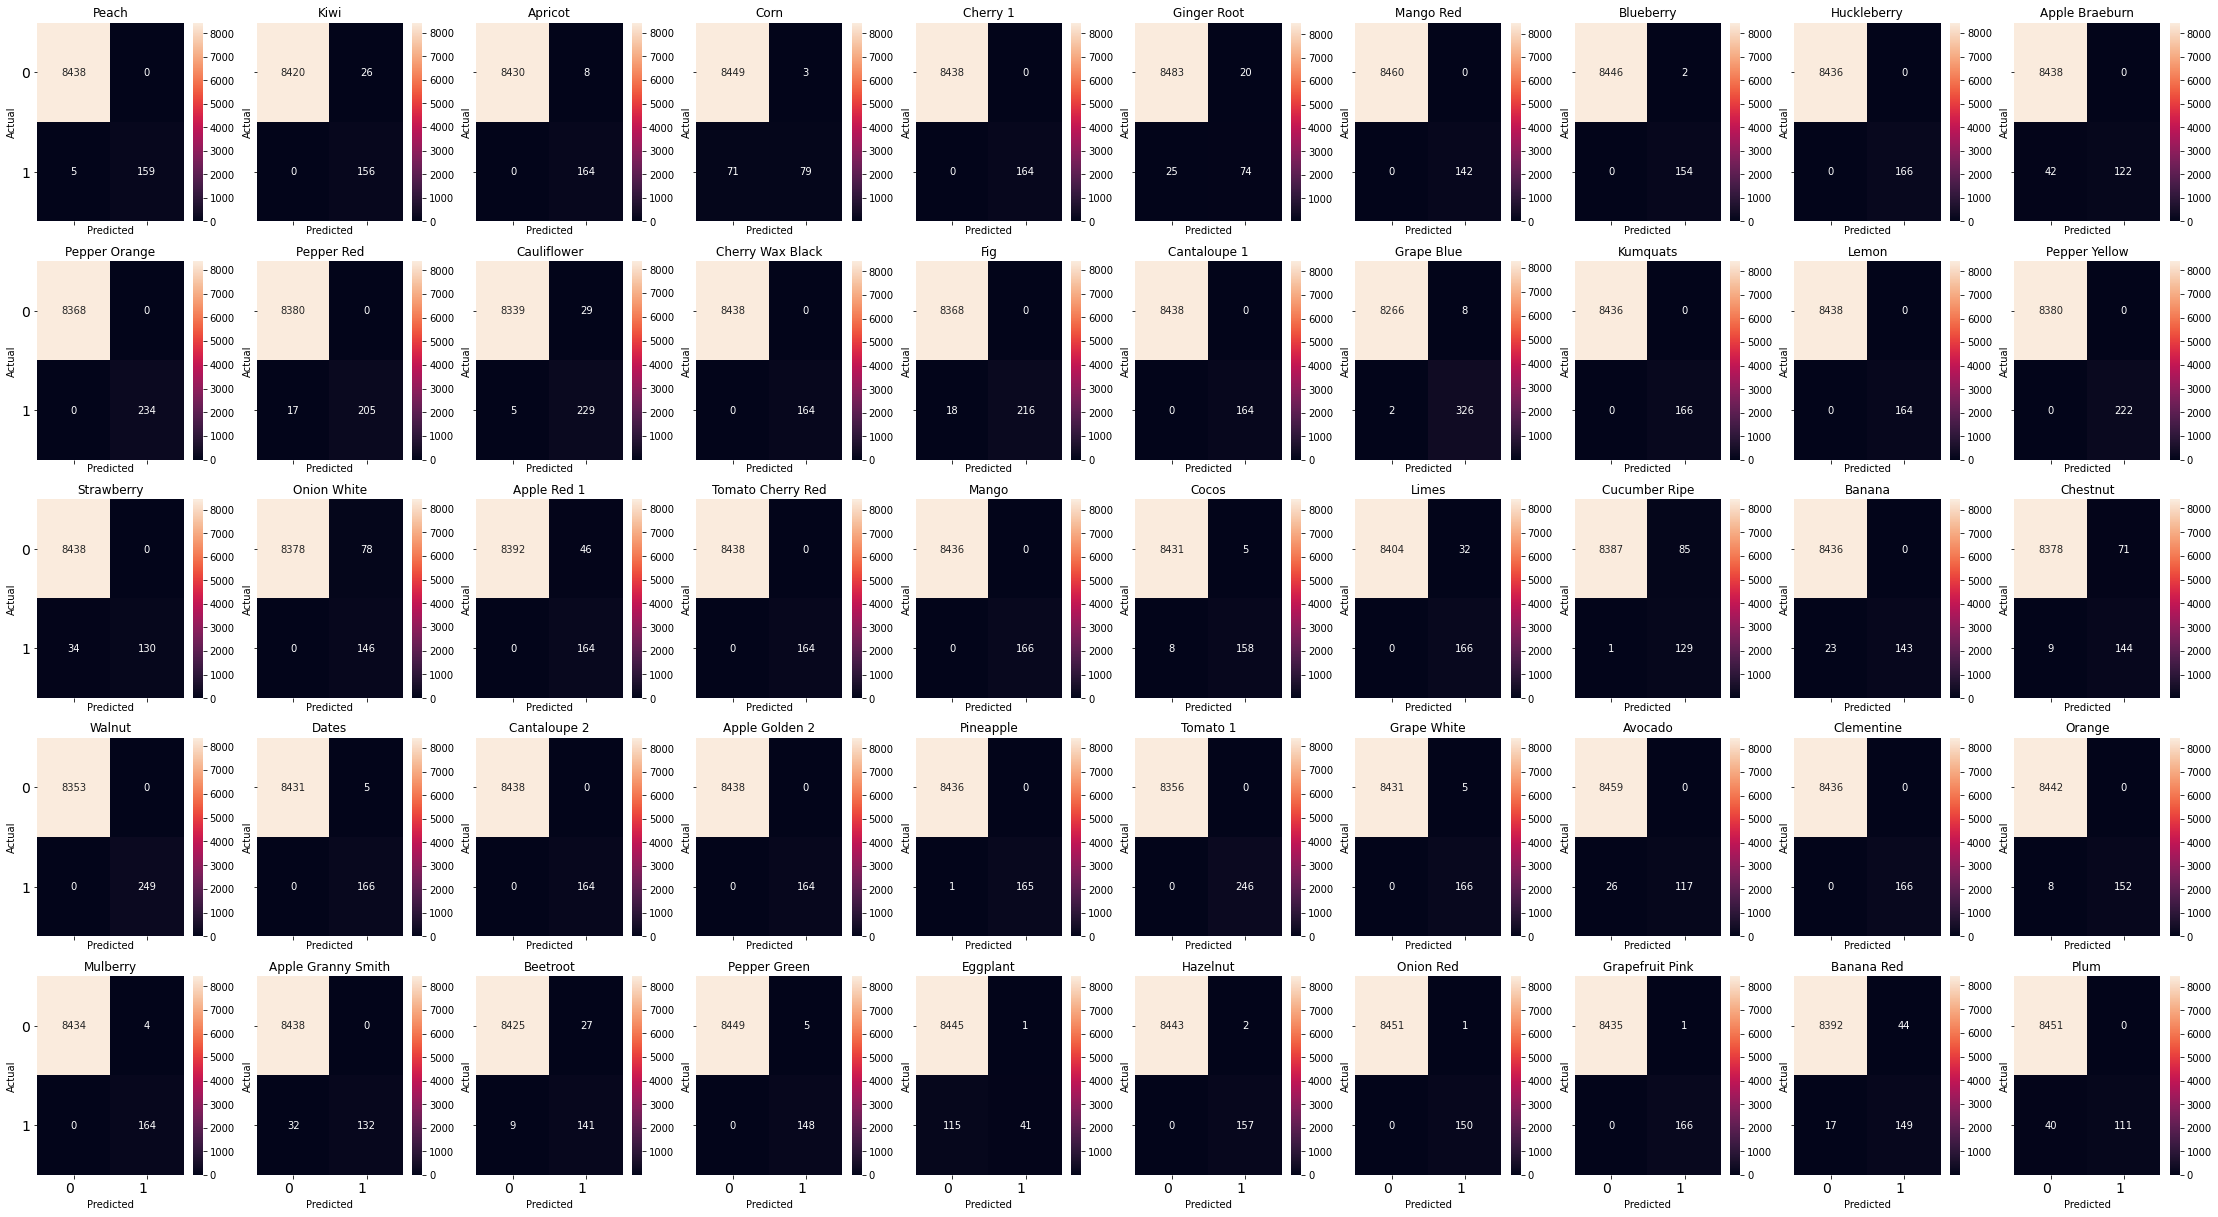

In [ ]:
def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sn.heatmap(df_cm, annot=True, fmt="d", cbar=True, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(["0", "1"], rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(["0", "1"], rotation=0, ha='right', fontsize=fontsize)
    axes.set_xlabel('Predicted')
    axes.set_ylabel('Actual')
    axes.set_title(class_label)
    
figw, figh = 32.0, 18.0
fig, ax = plt.subplots(ncols=10, nrows=5, sharex=True, sharey=True,
                         figsize=(figw, figh))
print(key_list)
for axes, cfs_matrix, label in zip(ax.flatten(), multilabel_confusion_matrix(y_true, y_pred, labels=range(50)), key_list):
    print_confusion_matrix(cfs_matrix, axes, label,["-", "+"])

plt.subplots_adjust(left=1/figw, right=1-1/figw, bottom=1/figh, top=1-1/figh)



plt.show()  

In [ ]:
import sklearn.metrics as skm

print( skm.classification_report(y_true,y_pred, testing_labels,target_names=key_list))

                    precision    recall  f1-score   support

             Peach       1.00      0.97      0.98       164
              Kiwi       1.00      0.97      0.98       164
           Apricot       1.00      0.97      0.98       164
              Corn       1.00      0.97      0.98       164
          Cherry 1       1.00      0.97      0.98       164
       Ginger Root       1.00      0.97      0.98       164
         Mango Red       1.00      0.97      0.98       164
         Blueberry       1.00      0.97      0.98       164
       Huckleberry       1.00      0.97      0.98       164
    Apple Braeburn       1.00      0.97      0.98       164
     Pepper Orange       1.00      0.97      0.98       164
        Pepper Red       1.00      0.97      0.98       164
       Cauliflower       1.00      0.97      0.98       164
  Cherry Wax Black       1.00      0.97      0.98       164
               Fig       1.00      0.97      0.98       164
      Cantaloupe 1       1.00      0.97

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1989: UserWarning: labels size, 8602, does not match size of target_names, 50
  .format(len(labels), len(target_names))
